In [1]:
# Certification Project by Joon Kim
#
# ## Part 1 - Data Exploration, Feature Selection

# In this module we use Spark in conjunction with some popular Python libraries
# to explore data and select features we will use in the next module which is model training,
# scoring and evaluation.

# ## Setup
# Import some useful packages and modules:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Create a SparkSession:
spark = SparkSession.builder.master("local").appName("creditcard_explore01").getOrCreate()

# Copy credit card data from CDSW project to HDFS

#!hdfs dfs -mkdir creditcardfraud
#!hdfs dfs -put data/creditcard.csv creditcardfraud

# Load the creditcard data from HDFS:

df = spark.read.csv("creditcardfraud/", sep=",", header=True, inferSchema=True)
# Show first 5 lines to see if the delimited lines have been read properly
df.show(5)

+----+------------------+-------------------+----------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|              V3|                V4|                 V5|                 V6|                 V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|               V16|               V17|                V18|               V19|                V20|                 V21|                V22|     

In [3]:

# And Print schema
df.printSchema()

# Define a new schema
from pyspark.sql.types import *
schema = StructType([
    StructField("Time", DoubleType()),
    StructField("V1", DoubleType()),
    StructField("V2", DoubleType()),
    StructField("V3", DoubleType()),
    StructField("V4", DoubleType()),
    StructField("V5", DoubleType()),
    StructField("V6", DoubleType()),
    StructField("V7", DoubleType()),
    StructField("V8", DoubleType()),
    StructField("V9", DoubleType()),
    StructField("V10", DoubleType()),
    StructField("V11", DoubleType()),
    StructField("V12", DoubleType()),
    StructField("V13", DoubleType()),
    StructField("V14", DoubleType()),
    StructField("V15", DoubleType()),
    StructField("V16", DoubleType()),
    StructField("V17", DoubleType()),
    StructField("V18", DoubleType()),
    StructField("V19", DoubleType()),
    StructField("V20", DoubleType()),
    StructField("V21", DoubleType()),
    StructField("V22", DoubleType()),
    StructField("V23", DoubleType()),
    StructField("V24", DoubleType()),
    StructField("V25", DoubleType()),
    StructField("V26", DoubleType()),
    StructField("V27", DoubleType()),
    StructField("V28", DoubleType()),
    StructField("Amount", DoubleType()),
    StructField("Class", IntegerType())
])

df = spark \
  .read \
  .format("csv") \
  .option("sep", ",") \
  .option("header", True) \
  .schema(schema) \
  .load("creditcardfraud/creditcard.csv")

df.describe("Time","Amount","Class").show()

root
 |-- Time: decimal(10,0) (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double

In [4]:
# Run some basic checks on the data - any NULL values?
df_nonull = df.dropna()
df_nonull.describe("Time","Amount","Class").show()

+-------+------------------+------------------+--------------------+
|summary|              Time|            Amount|               Class|
+-------+------------------+------------------+--------------------+
|  count|            284807|            284807|              284807|
|   mean| 94813.85957508067| 88.34961925089794|0.001727485630620034|
| stddev|47488.145954566906|250.12010924018742| 0.04152718963546536|
|    min|               0.0|               0.0|                   0|
|    max|          172792.0|          25691.16|                   1|
+-------+------------------+------------------+--------------------+



In [5]:
# Add a new Category Column "Fraud"
df2 = df.withColumn("Fraud", df.Class == 1)

# Describe the new DataFrame
df2.select("Time", "V1", "V2", "Amount", "Class", "Fraud").show(5)
#df2.describe("Time", "V1", "V2", "Amount", "Class").show()
  
# Load into Panda Dataframe to visualize summary better.  
pdf = df2.toPandas()
pdf.describe()

+----+------------------+-------------------+------+-----+-----+
|Time|                V1|                 V2|Amount|Class|Fraud|
+----+------------------+-------------------+------+-----+-----+
| 0.0|  -1.3598071336738|-0.0727811733098497|149.62|    0|false|
| 0.0|  1.19185711131486|   0.26615071205963|  2.69|    0|false|
| 1.0| -1.35835406159823|  -1.34016307473609|378.66|    0|false|
| 1.0|-0.966271711572087| -0.185226008082898| 123.5|    0|false|
| 2.0| -1.15823309349523|  0.877736754848451| 69.99|    0|false|
+----+------------------+-------------------+------+-----+-----+
only showing top 5 rows



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.958151e-16,-3.147640e-15,...,1.471982e-16,8.042109e-16,5.282450e-16,4.458267e-15,1.426896e-15,1.701640e-15,-3.671606e-16,-1.218152e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


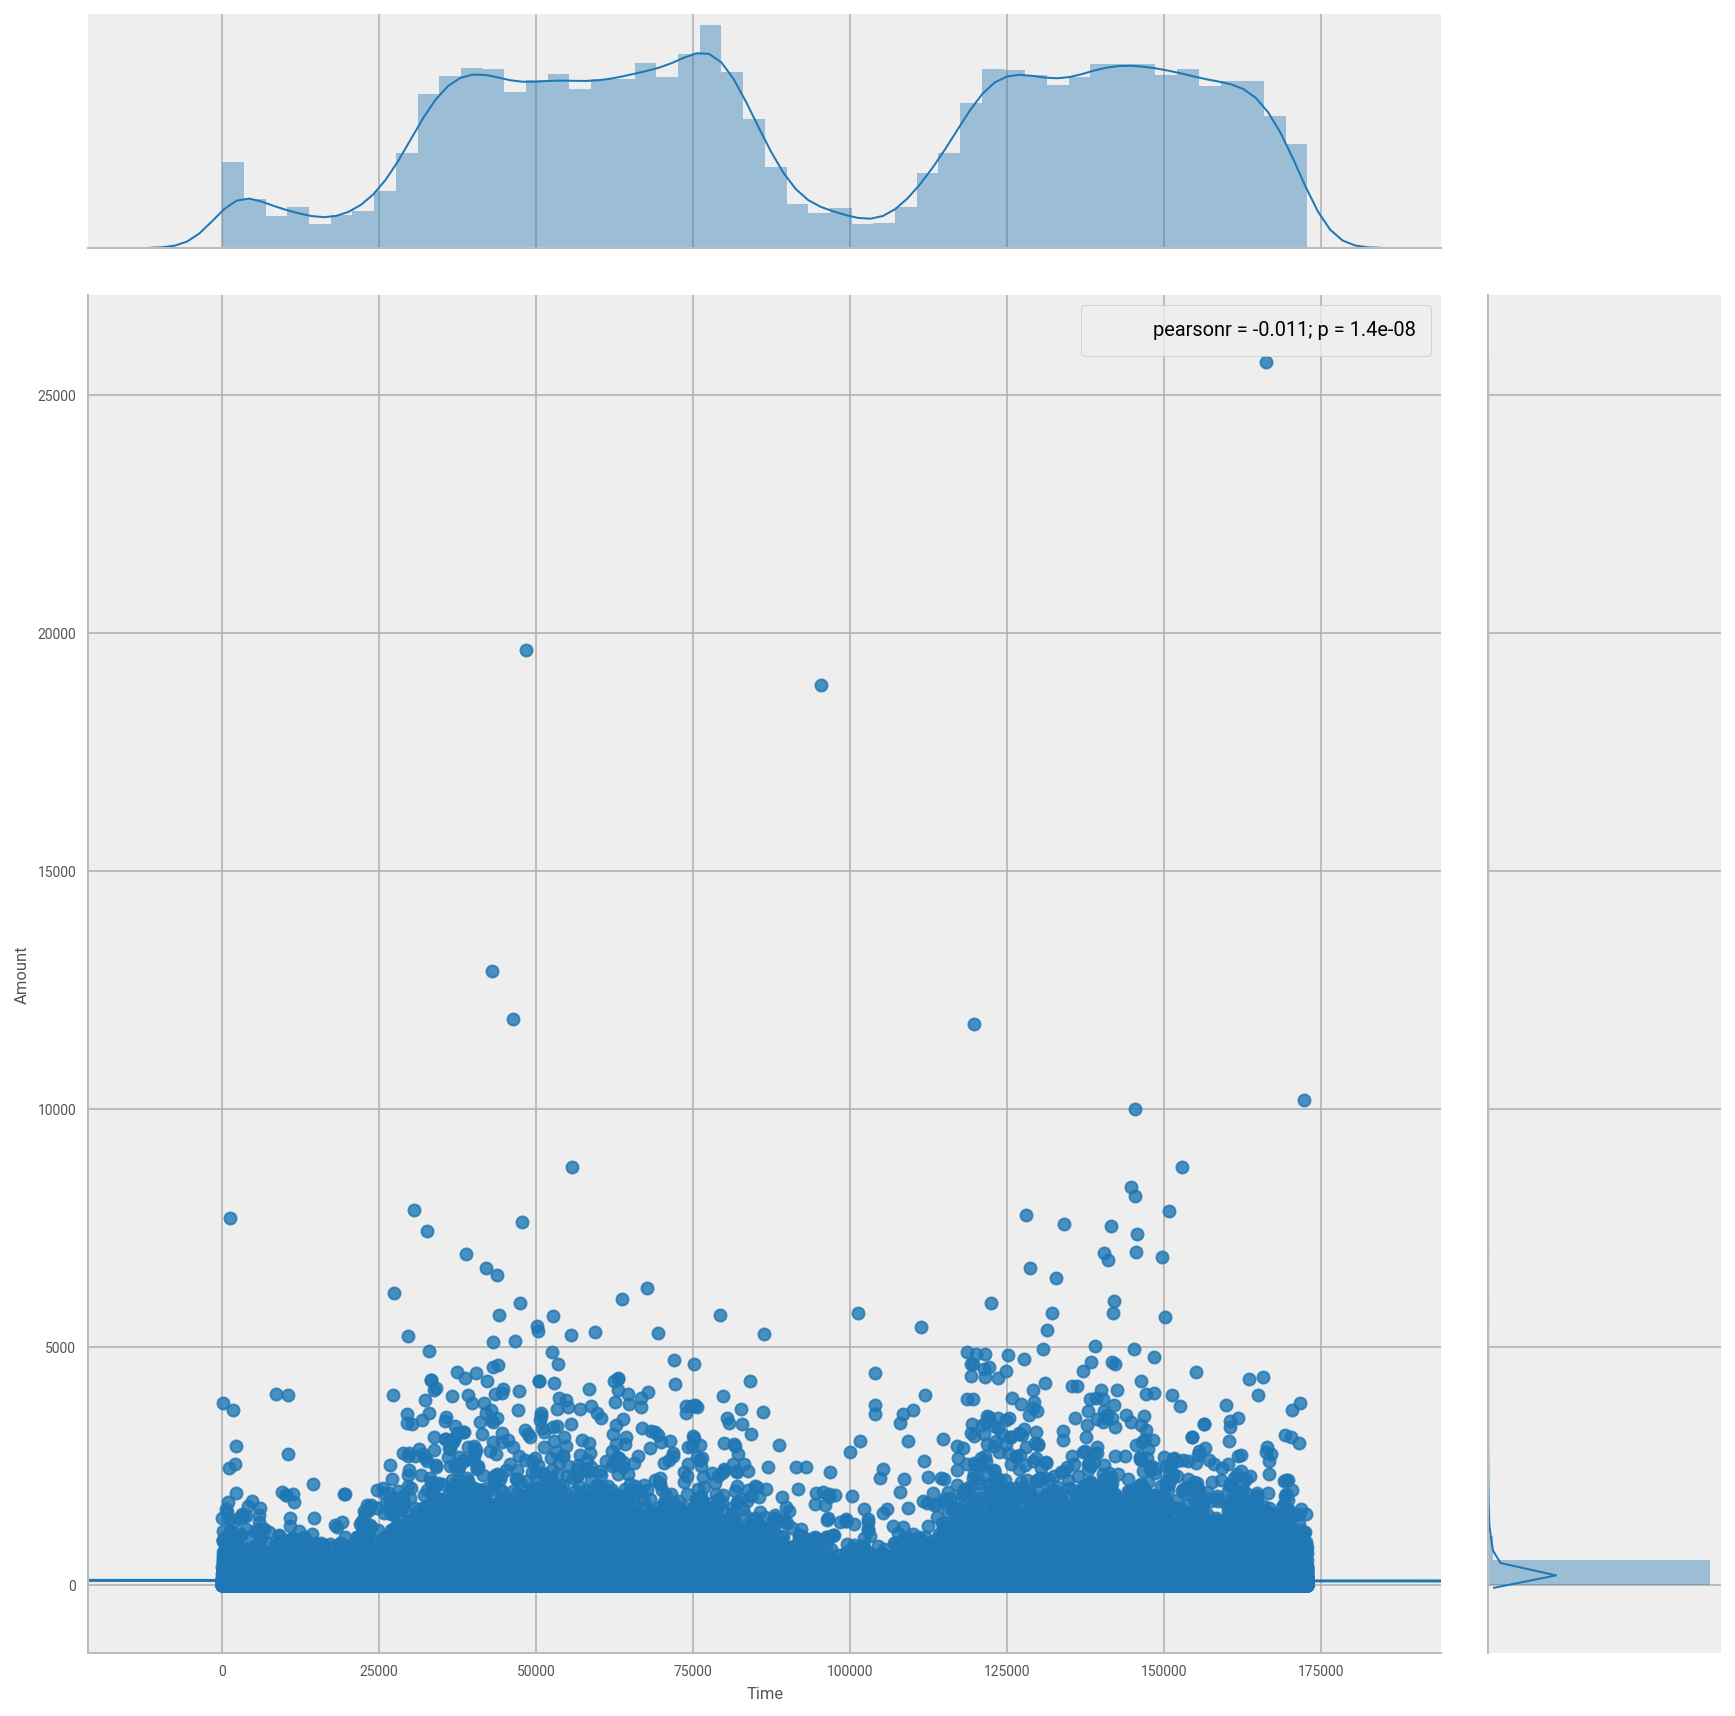

In [6]:
# Time Column - View distribution
# Plot Time with normal, and plot Time with fraud
# sns.distplot(pdf["Time"], kde=False)
# sns.distplot(pdf["Time"][pdf.Class == 0], kde=False)
# sns.distplot(pdf["Time"][pdf.Class == 1], kde=False)


# Filter "Normal" DataFrame where Class == 0
# and filter "Fraudulent" DataFrame where Class == 1

pdf_normal = pdf[pdf.Class == 0]
# pdf_normal.count()

# Plot distribution of Normal transactions
sns.jointplot(x="Time", y="Amount", data=pdf_normal, size=12, kind="reg")
